# Sensitivity Analysis

## Explanation of Notebook

This notebook started out addressing a dataset related to my internship with Earth Economics. I was asked to read through a research paper (PDF shown below), and use the sensitivity analysis method shown on the data provided to me related to the organizations project. I am not able to show the data from Earth Economics, but I can show the process applied to the data in the research paper shown below. 

After replicating the sensitivity analysis method in the paper on the data specific to the Earth Economics project, I realized the results were off. I set up a proof to simplify the equations in the orginal paper, and was able to show a few critiques of the method when applied to the Ecosystem Service Valuation (ESV) function. The coefficient of sensitivity (CS) is independent of adjustments to the inputs, all CS values are less than 1, and all the CS values summed across the land types add to 1.

This is important because the CS values are supposed to be a measure of elasticity, where values above 1 imply less robust estimates, and values under 1 imply robust estimates. The proof, which was just an algebraic simplification (laid out below in LaTex code) of the formulas, shows that the CS just calculates the percentage of the ESV a specific land type makes up out of the total.

I have displayed the PDF of the research paper in the notebook below, but the link to access it on the Professor's website is: [Link to Original Paper](https://agrilife.org/kreuter/files/2013/01/Change-in-ecosystem-service-values-in-SanAntonio-areaTexas_6.pdf)

Additionally, while all of the work I show below is original, after sharing this notebook with my supervisor, we found that there was a critique paper already written whose process I had unknowlingly replicated (more or less). The link to the abstract for that paper is: [Link to Critique](https://www.sciencedirect.com/science/article/pii/S2212041616301668)

**Note: CS and ESV formulas are defined below in the notebook**

To start off, I will render a javascript button in HTML that allows the code to be hidden or shown.

In [1]:
#Import necessary library packages to render HTML in a code cell
from IPython.display import HTML

#Define the javascript function and HTML to produce the show/hide code button
text = str('''
    <script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
HTML(text)

In [3]:
#File of the original sensitivity analysis paper
file = "https://agrilife.org/kreuter/files/2013/01/Change-in-ecosystem-service-values-in-SanAntonio-areaTexas_6.pdf"

#Render the pdf file using an HTML IFrame
HTML("<iframe width = 100% height = 700 src = " + file + "></iframe")

## Explanation of Data

So the goal of this research paper, and what we were trying to do at Earth Economics was something called Ecosystem Service Valuation (ESV). In the paper above, there are two inputs to this, the number of acres of a given land area and type, and the ecosystem service benefit coefficient corresponding to that land type (in dollars per acre per year). There will be many different land types in a given study area, and each will have a different benefit estimate. 

The total ecosystem service value of a given study area will be in units of dollars per year. In the paper above there are six land cover types, and the acreage of each was measured through satellite images, and some GIS software. To get the total ESV, each land type benefit coefficient amount (VC) is multiplied by its corresponding acreage, then these are all added together.

Put into a formula: $$ESV = \sum_{i=1}^{n} VC_i \cdot A_i \\ $$
$$VC_i = \text{benefit coefficient amount for land type i} \\ $$
$$A_i = \text{number of Acres for land type i} \\ $$
$$\text{The sum is over the n land types} \\ $$

## Diving Into the Code: Displaying Relevant Data Tables

There are four tables of relevant data in the PDF above that I will replicate using an HTML rendering below. To do this I defined two functions. The first (html_table) creates a table given a list of headers and rows, and the second (html_tables) displays all the tables together.

In [4]:
#Define function to create HTML table text for inputted headers and rows
def html_table(head, row):
    
###==========> Initialize variables

    #Define the number of columns in the table
    cols = len(head)
    
    #Initialize an empty string for the row text
    row_text = ''
    
    #Use a counter along with the number of columns to start a new line when needed
    counter = 0

###==========> End variable initialization

###==========> Loop over the header list to create header HTML text

    #Starting tag for HTML table headers
    head_text = '<tr>'
    
    #Loop over the headers and create tags for each
    for header in head:
        head_text += '<th>' + str(header) + '</th>'
        
    #Close the initial header tag
    head_text += '</tr>'
    
###==========> End header text creation

###==========> Loop over the row list to create row HTML text
    
    #Loop over the elements in the list with all the row entries
    for element in row:
        
        #Starting row tag if it is the first entry of a row
        if counter == 0:
            row_text += '<tr>'
        
        #Add one to the counter
        counter += 1
        
        #Add each element of the row to the text
        row_text += '<td>' + str(element) + '</td>'
        
        #If the row is finished, close the initial row tag and reset counter to 0 to start new row
        if counter == cols:
            row_text += '</tr>'
            counter = 0

###==========> End row text creation

###==========> Finish creating full HTML text for the table and return it as output

    #Concatenate together the header text and the row text into one
    html_code = str(head_text) + str(row_text)
    
    #Return the HMTL text for the inputted table
    return html_code

###==========> End HTML text creation for single table

In [5]:
#Define function to display all of the tables created
def html_tables(tables, cols):

###==========> Initialize variables
    
    #Use a counter to set how many tables per row are displayed
    counter = 0
    
    #A list of positions that the tables will be aligned on
    position = ['left','center','right']
    
    #Initialize the HTML text with the appropriate tag
    text = '<html>'

###==========> End variable initialization

###==========> Loop over each table created from the html_table function
    
    #Loop over each table in the tables list
    for table in tables:
        
        #Add the opening and closing table tags for each list, with the position called in the position list
        text += '<table align=' + position[counter] + '>' + table + '</table>'
        
        #Add 1 to the counter
        counter += 1
        
        #If the counter equals the desired column limit, reset it to zero
        if counter == cols:
            counter = 0

###==========> End looping over tables

###==========> Finish defining the HTML text and return the rendered output
    
    #Close the HTML tag to finish the text creation
    text += '</html>'
    
    #Return a rendered display of the HTML text
    return HTML(text)

In [6]:
#Initialize an empty list for the table texts to be appended into
tables = []

###==========> Create lists of headers and rows for the four relevant data tables in the paper

#Create the headers and rows of the first table
head = ['Land Cover<br>categories',
            'Equivalent biome',
            'Ecosystem service<br />coefficient<br>($/ha per year)']
row = ['Rangeland','Grass/rangelands','232',
        'Woodland','Temperate/boreal forest','302',
        'Bare Soil','Cropland','92',
        'Residential','Urban','0',
        'Commercial','Urban','0',
        'Transportation','Urban','0']

#Create the headers and rows of the second table
head1 = ['Land-Use Category', 
            'Total Area (ha)<br>____<br>1976',
            '<br>____<br>1985',
            '<br>____<br>1991']
row1 = ['Rangeland', '80,497','59,126','27,896',
        'Woodland','8,886', '25,336','44,654',
        'Bare Soil','6,353','13,514','13,047',
        'Residential','11,499','10,087','16,655',
        'Commercial','6,116','10,457','15,362',
        'Transportation','25,748','23,060','23,857']

#Create the headers and rows of the third table
head2 = ['Land-Use Category', 
            'ESV<br>____<br>1976',
            '(US$×10^6<br>____<br>1985',
            'per  year)<br>____<br>1991']
row2 = ['Rangeland', '18.68','13.72','6.47',
        'Woodland','2.68', '7.65','13.49',
        'Bare Soil','0.58','1.24','1.20',
        'Urban Categories','0.00','0.00','0.00',
        'Total','21.94','22.61','21.16']

#Create the headers and rows of the fourth table
head3 = ['Change  in  valuation  coefficient  (VC)', 
            'ESV<br>____<br>1976',
            '<br>____<br>1991',
            'CS<br>____<br>1976',
            '<br>____<br>1991']
row3 = ['Rangeland  VC+50%', '31.28','24.39','0.85','0.31',
        'Rangeland  VC-50%','12.61', '17.92','0.85','0.31',
        'Woodland  VC+50%','23.28','27.90','0.12','0.64',
        'Woodland  VC-50%','20.60','14.41','0.12','0.64',
        'Woodland  VC=Rangeland  VC','21.32','18.03','0.12','0.64',
        'Bare  soil  VC+50%','22.24','21.76','0.03','0.06',
        'Bare  soil  VC-50%','21.65','20.56','0.03','0.06']

###==========> End creation of header and row lists

###==========> Create lists of names that can reference all the headers and rows in a loop, and loop over them

#Create header/row name lists
heads = [head, head1, head2,head3]
rows = [row, row1, row2,row3]

#Loop over the headers and rows and create tables for each, appending to the tables list
for i in range(len(heads)):
    tables.append(html_table(heads[i], rows[i]))
    
###==========> End table creation

In the original data table on the bottom right in the paper, the CS values are blank when they are equal to the values directly above them in the table. I replaced these with the actual values rather than leaving them blank. I checked the math to make sure this was correct, and you are welcome to do the same to confirm!

In [7]:
#With the created tables list, call the display function to display all of them
html_tables(tables, 2)

## Diving Into the Math: Simplifying the Equations in the Paper

### The elasticity equation from Urs' paper, and its independence from the adjustment percentage

The formula for the coefficient of sensitivity (CS) of the adjusted ESV with respect to the adjusted VC for a given adjustment x is laid out below:

$$CS_x = \dfrac{\dfrac{ESV_x - ESV}{ESV}}{\dfrac{VC_{kx} - VC_k}{VC_k}} \\ $$
$$\text{The ESV for any single land type k is given by: } \ ESV_k = A_k \cdot VC_k \\ $$
$$\text{For any given adjustment percentage x and land type k:} \\ $$
$$ESV_{kx} = A_k \cdot (x \cdot VC_k) = x \cdot A_k \cdot VC_k = x \cdot ESV_k \\ $$
$$\text{Calculating the adjusted ESV would just involve subtracting the ESV contributed from the land type in question, and then adding back on its adjusted value} \\ $$
$$\text{Therefore: } ESV_x = ESV - ESV_k + ESV_{kx} = ESV - ESV_k + x \cdot ESV_k \\ $$
$$\text{So:} \ ESV_x = ESV + (x-1)\cdot ESV_k \\ $$
$$\text{The adjustment to} \ VC_k \ \text{for a give adjustment x is: } \ VC_{kx} = x\cdot VC_k \\ $$
$$\text{If we subsitute the values above for} \ ESV, \ ESV_x, \ VC_k, \ VC_{kx}, \text{the numerator will be:} \\ $$ $$\frac{ESV_x - ESV}{ESV} = \frac{(ESV + (x-1)\cdot ESV_k) - ESV}{ESV} \\ $$
$$\text{and canceling out the ESV terms on top:} \quad\ \frac{(x-1)\cdot ESV_k}{ESV} \\ $$
$$\text{For the denominator, we have} \ \frac{VC_{kx} - VC_k}{VC_k} = \frac{x\cdot VC_k - VC_k}{VC_k} = \frac{(x-1)\cdot VC_k}{VC_k} = (x-1) \\ $$ 
$$\text{Combining the numerator and the denominator:} \ CS_x = \frac{(x-1)\cdot ESV_k}{ESV\cdot (x-1)} \\ $$
$$\text{Canceling out the (x-1) terms, we are left with:} \ CS_x = \frac{ESV_k}{ESV} \\ $$
$$\text{So, since the coefficient is independent of x:} \ CS = \frac{ESV_k}{ESV}$$

### The Midpoint Elasticity Formula

Another approach, instead of the simple midpoint formula which calculates the ratio of the percent change between adjusted inputs and the resultant output, is what's called the Midpoint Elasticity Formula. This is more generally used in Economics, with the difference being that it divides the difference between the adjusted value and original by their average. This has the advantage of being independent of the reference point.

The Midpoint Elasticity Formula, defined in the context of these formulas, is defined and then simplified below. This formula is dependent on the adjusment percentage x, unlike the standard Elasticity Formula

$$\text{Define the Midpoint Elasticity formula as: } MP_x = \dfrac{\dfrac{ESV_x - ESV}{avg(ESV_x, ESV)}}{\dfrac{VC_{kx} - VC_k}{avg(VC_{kx}, VC_k)}} \\ $$
$$\text{Simplifying the fraction, we get: } MP_x = \frac{(ESV_x - ESV)\cdot avg(VC_{kx}, VC_x)}{(VC_{kx} - VC_x)\cdot avg(ESV_x, ESV)} \\ $$
$$ESV_x - ESV = (x-1)\cdot ESV_k \\ $$
$$avg(ESV_x, ESV) = \frac{ESV + (x-1)\cdot ESV_k + ESV}{2} = \frac{2\cdot ESV + (x-1)\cdot ESV_k}{2} \\ $$
$$VC_{kx} - VC_x = x\cdot VC_k - VC_k = (x-1)\cdot VC_k \\ $$
$$avg(VC_{kx}, VC_x) = \frac{x\cdot VC_k + VC_k}{2} = \frac{(x+1)\cdot VC_k}{2} \\ $$
$$(ESV_x - ESV)\cdot avg(VC_{kx}, VC_x) = \frac{((x-1)\cdot ESV_k)\cdot ((x+1)\cdot VC_k)}{2} \\ $$
$$(VC_{kx} - VC_x)\cdot avg(ESV_x, ESV) = \frac{((x-1)\cdot VC_k)\cdot (2\cdot ESV + (x-1)\cdot ESV_k)}{2} \\ $$
$$\text{Putting this together into one fraction, we can cancel out two of the (x-1)'s, the } VC_k\text{'s, and two of the 2's} \\ $$
$$MP_x = \frac{(x+1)\cdot ESV_k}{(2\cdot ESV) + ((x-1)\cdot ESV_k)}$$

## Diving Into the Code Pt. 2

Before getting into the functions to calcuate and graph the elasticity results, I will define a pandas dataframe to store all of the data.

First, this data frame takes the first two tables and shows the VC for each land type, and the Area values across the years and land types

In [8]:
###==========> Import the libraries needed for calculation and graphing, set parameters

import numpy as np #Linear Algebra and array library
import pandas as pd #Library tabular data and relevant operations
import seaborn as sns #Statistical graphing library
import matplotlib.pyplot as plt #Basic graphing library
import random #Library for random number generation
from decimal import *
getcontext().prec = 4

#Setting so that the graphs appear within this notebook
%matplotlib inline

###==========> End library importing and parameter setting

In [9]:
###==========> Manipulate the data slightly so it is easily read into dataframe

#Information for Valuation Coefficients (VC's)
head = ['Land_Type',
        'Biome',
        'VC']
row = [['Rangeland','Grass/rangelands',232],
       ['Woodland','Temperate/boreal forest',302],
       ['Bare Soil','Cropland',92],
       ['Residential','Urban',0],
       ['Commercial','Urban',0],
       ['Transportation','Urban',0]]

#Information for amount of area per land cover type
head1 = ['Land_Type', 
         'Area_1976',
         'Area_1985',
         'Area_1991']
row1 = [['Rangeland', 80497,59126,27896],
        ['Woodland',8886, 25336,44654],
        ['Bare Soil',6353,13514,13047],
        ['Residential',11499,10087,16655],
        ['Commercial',6116,10457,15362],
        ['Transportation',25748,23060,23857]]

###==========> End dataframe setup

###==========> Create two dataframes with the above data, then merge into one

#Create first and second dataframes
table1 = pd.DataFrame(row, columns = head)
table2 = pd.DataFrame(row1, columns = head1)

#Merge the two dataframes
data = pd.merge(left = table1, right = table2, on = 'Land_Type', how = 'inner')

#Display the new merged dataframe
data

###==========> End dataframe creation

,Land_Type,Biome,VC,Area_1976,Area_1985,Area_1991
0,Rangeland,Grass/rangelands,232,80497,59126,27896
1,Woodland,Temperate/boreal forest,302,8886,25336,44654
2,Bare Soil,Cropland,92,6353,13514,13047
3,Residential,Urban,0,11499,10087,16655
4,Commercial,Urban,0,6116,10457,15362
5,Transportation,Urban,0,25748,23060,23857


Adding on more data, this dataframe now includes the ESV values for each year and land cover type

In [10]:
###==========> Add in columns for each year that give total ESV by land cover type

#Define list of years to iterate over
years = ['1976','1985','1991']

#Loop of the years list
for year in years:
    data['ESV_' + year] = data.VC * data['Area_' + year]

###==========> End new column generation

###==========> Add in a totals row for each of the columns

#Add row at the bottom for totals
data.loc[6,'Land_Type'] = 'Total'
data.loc[6,'Biome'] = 'Total'

#Fill the null values with zero so the columns can be summed
data.fillna(0, inplace = True)

#Sum each of the numeric columns and append to the totals row
data.iloc[6,2:] = data.iloc[:,2:].apply(np.sum, axis = 0)

###==========> End total row creation

#Display the data
data

,Land_Type,Biome,VC,Area_1976,Area_1985,Area_1991,ESV_1976,ESV_1985,ESV_1991
0,Rangeland,Grass/rangelands,232.0,80497.0,59126.0,27896.0,18675304.0,13717232.0,6471872.0
1,Woodland,Temperate/boreal forest,302.0,8886.0,25336.0,44654.0,2683572.0,7651472.0,13485508.0
2,Bare Soil,Cropland,92.0,6353.0,13514.0,13047.0,584476.0,1243288.0,1200324.0
3,Residential,Urban,0.0,11499.0,10087.0,16655.0,0.0,0.0,0.0
4,Commercial,Urban,0.0,6116.0,10457.0,15362.0,0.0,0.0,0.0
5,Transportation,Urban,0.0,25748.0,23060.0,23857.0,0.0,0.0,0.0
6,Total,Total,626.0,139099.0,141580.0,141471.0,21943352.0,22611992.0,21157704.0


Finishing up, this dataframe now has columns for the coefficient of sensitivity for each land type and year

In [11]:
###==========> Add in new columns for each year for the CS values

#Define list of years to iterate over
years = ['1976','1985','1991']

#Loop of the years list
for year in years:
    
    #Divide each entry in each ESV column by the total to get the CS value for each land type
    data['CS_' + year] = data['ESV_' + year]/data.loc[6,'ESV_' + year]

###==========> End CS value generation

data

,Land_Type,Biome,VC,Area_1976,Area_1985,Area_1991,ESV_1976,ESV_1985,ESV_1991,CS_1976,CS_1985,CS_1991
0,Rangeland,Grass/rangelands,232.0,80497.0,59126.0,27896.0,18675304.0,13717232.0,6471872.0,0.851069,0.606635,0.305887
1,Woodland,Temperate/boreal forest,302.0,8886.0,25336.0,44654.0,2683572.0,7651472.0,13485508.0,0.122295,0.338381,0.637381
2,Bare Soil,Cropland,92.0,6353.0,13514.0,13047.0,584476.0,1243288.0,1200324.0,0.026636,0.054984,0.056732
3,Residential,Urban,0.0,11499.0,10087.0,16655.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Commercial,Urban,0.0,6116.0,10457.0,15362.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,Transportation,Urban,0.0,25748.0,23060.0,23857.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,Total,Total,626.0,139099.0,141580.0,141471.0,21943352.0,22611992.0,21157704.0,1.000000,1.000000,1.000000


### Defining functions to calculate and graph the results from the two Elasticity Formulas

In the next section, I will use the data in the tables from the paper displayed above to show the results from the two Elasticity formulas above. If you have the code shown, the below functions are defined to create a dictionary of elasticities and graph the elasticities. I have the graphs resulting from those functions displayed

In [12]:
#This function takes in an attribute (Land_Type or Biome), a list of adjustments, and the formula choice
def get_elasticity(attribute, adjustments, formula):
    
    #Initialize dictionary to hold MP Elasticity values
    elasticity = {}
    
    #Initialize the list of years
    years = ['1976','1985','1991']
    
    #Define the set of attributes based on Land_Type vs. Biome
    attributes = list(data[attribute].unique())
    
    #Loop over the years and create an empty list for each
    for year in years:
        
        #Define the total ESV value for the given year
        ESV = list(data[data[attribute] == 'Total']['ESV_' + year])[0]

        #Iterate over the unique list of attributes
        for unit in attributes:
            
            #Initialize an empty list for the current attribute and year
            elasticity[str(unit) + '_' + year] = []
            
            unit_ESV = data[data[attribute] == unit]['ESV_' + year].sum()
            
            #Loop over the adjument percentages to fill in the current attribute elasticity list
            for pct in adjustments:
            
                #Define the decimal form of the adjustment percentage
                x = (100 + pct)/100
            
                #If statement to decide whether to calculate based on midpoint formula or formula from paper
                if formula == 'midpoint':
                    
                    #calculate the numerator
                    num = (x+1)*unit_ESV
                    #calculate the denominator
                    denom = (2*ESV) + (x-1)*unit_ESV
                    
                    #Append value to elasticity list
                    elasticity[str(unit) + '_' + year].append(round(num/denom,4))
            
                elif formula == 'classic':
                    
                    #Append the correct value for the formula from the paper
                    elasticity[str(unit) + '_' + year].append(round(unit_ESV/ESV,4))
    
    #Function returns the dictionary
    return elasticity

In [13]:
#Define a function that takes in the elasticity dictionary and graphs it
def graph(elasticity, attribute, adjustments, formula):
    
    #Initialize a list of the years
    years = ['1976','1985','1991']
    
    #Create a subplot iterable with a defined size
    fig, axarr = plt.subplots(1, 3, figsize = (16,8), sharey = True, sharex = True)
    
    #Create a list of 3 empty lists, each of these will take the data for each subplot
    plots = [[],[],[]]
    
    #Initialize the list of attributes
    attributes = sorted(list(data[attribute].unique()), reverse = True)
    attributes.remove('Total')
    
    #Loop over the index and value in the years list to be able to call the subplot
    for i, year in enumerate(years):
    
        #Loop of each attribute in the attributes list
        for unit in attributes:
            
            #Define the name that is the key in the elasticity dictionary
            name = str(unit) + '_' + year
            
            #Append the list from the elasticity dictionary to the correct list in the plots list
            plots[i].append(elasticity[name])
        
        #Plot a stackplot at the current subplot
        axarr[i].stackplot(adjustments, plots[i], labels = attributes)
        
        #Set the x-label
        axarr[i].set_xlabel('Percent Adjustment')
        #Set the y-label
        axarr[i].set_ylabel('Elasticity')
        #Choose where the legend goes
        axarr[i].legend(loc = 'upper left', fancybox = True)
    
        #Use the if statement to decide how to title the graph
        if formula == 'midpoint':
            axarr[i].set_title('Midpoint Formula' + '_' + year)
        else:
            axarr[i].set_title("Classic Formula" + "_" + year)
        
    return None

Now, for each attribute in the data (Land Type/Biome) and each formula (Classic/Midpoint) I will display the graphs

**First is for Land Type and with midpoint formula**

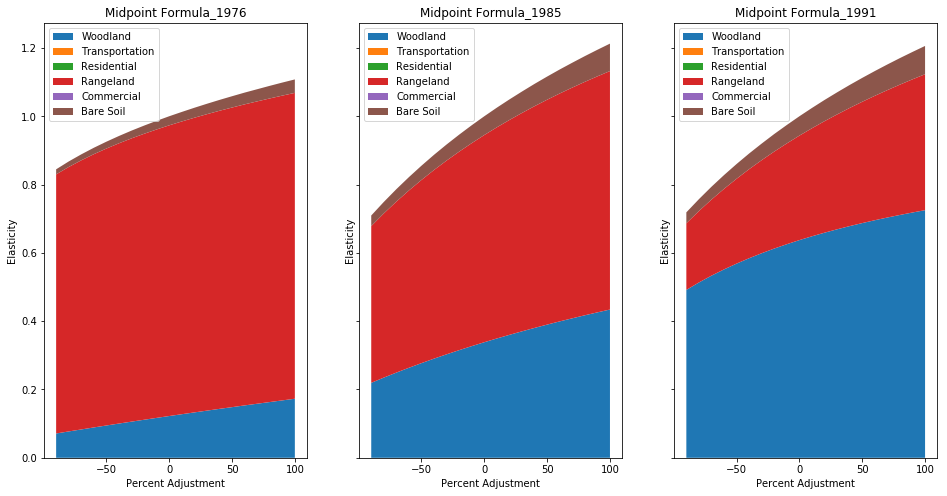

In [14]:
attribute = 'Land_Type'
adjustments = list(range(-90,110,10))
formula = 'midpoint'
elasticity = get_elasticity(attribute, adjustments, formula)
graph(elasticity, attribute, adjustments, formula)

**Second is for Land Type and with classic formula**

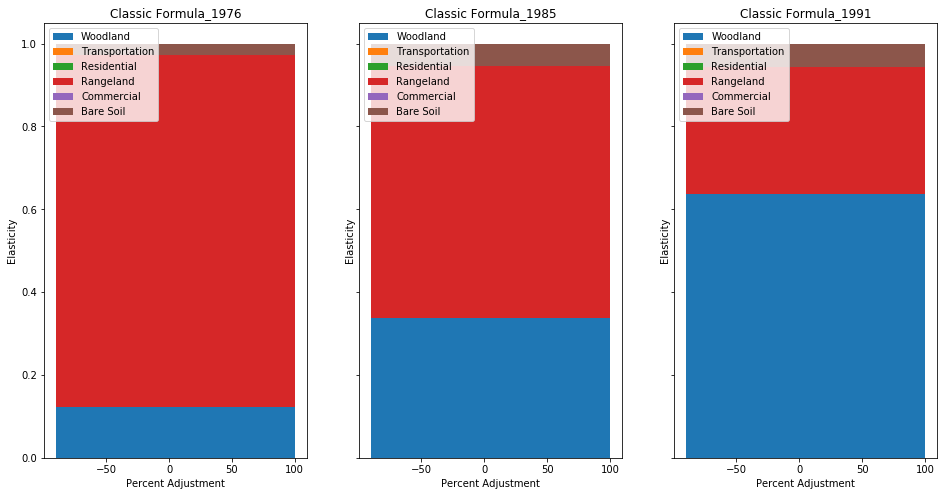

In [15]:
attribute = 'Land_Type'
adjustments = list(range(-90,110,10))
formula = 'classic'
elasticity = get_elasticity(attribute, adjustments, formula)
graph(elasticity, attribute, adjustments, formula)

**Third is for Biome and with midpoint formula**

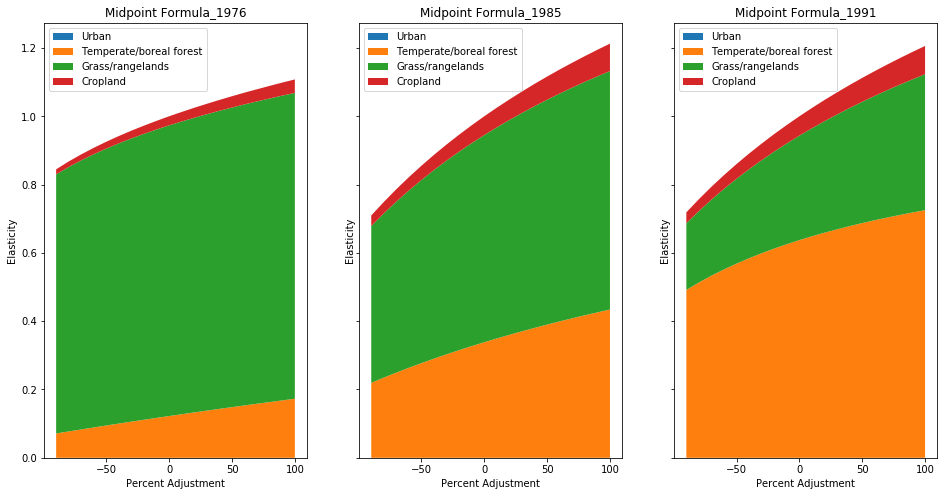

In [16]:
attribute = 'Biome'
adjustments = list(range(-90,110,10))
formula = 'midpoint'
elasticity = get_elasticity(attribute, adjustments, formula)
graph(elasticity, attribute, adjustments, formula)

**Last is for Biome and with classic formula**

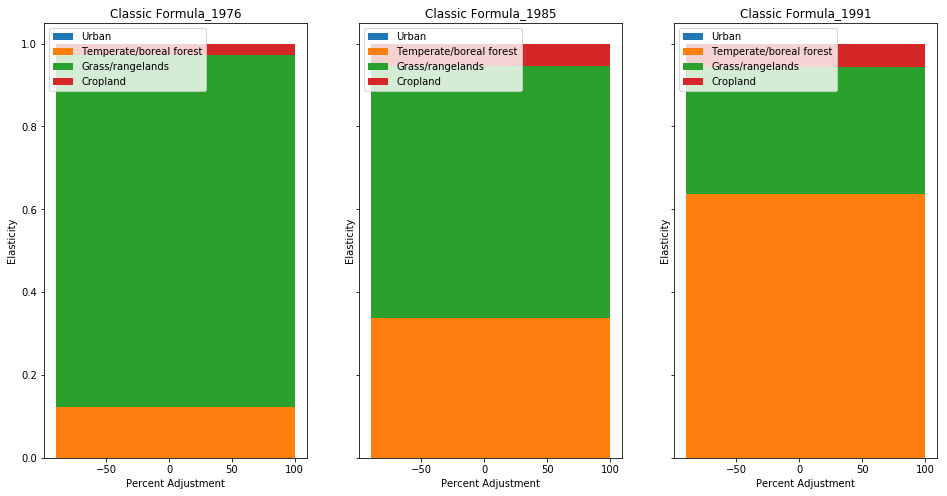

In [17]:
attribute = 'Biome'
adjustments = list(range(-90,110,10))
formula = 'classic'
elasticity = get_elasticity(attribute, adjustments, formula)
graph(elasticity, attribute, adjustments, formula)

## Conclusion of Notebook

**Literature examples:**

*From screening to quantitative sensitivity analysis. A unified approach*

*Sensitivity analysis ecosystem service valuation Sanchez-Canales et al 2012*

*Sensitivity analysis: how to detect important factors in large models*

Most of the methods I found in the ecosystem services literature and in the academic literature in general involve running simulations by pulling random values for each input and assessing the effects on the output.

These types of methods, however, are used for complex models where the partial derivative with respect to the inputs are to laborous/impossible to calculate. Many of these methods (such as the Morris/Elementary Effects method) are just aggregates of the estimates of the derivates across a range of varied inputs.

For this data and model, though, it is possible (easy in fact) to calculate the partial derivatives with respect to the inputs (Acres and vaulation coefficients). Since we are able to do this, complex sensitivity analysis methods aren't really applicable, and are an example of the math used being too complicated for the model.

If the model was different, these approaches would take on different meaning and may end up being applicable

$$\text{As above: The total ecosystem service value is:} \ ESV = \sum_{i=1}^{n} A_i\cdot VC_i \\ $$
$$A_i =\text{Acres} \quad\ VC_i =\frac{\text{Dollars}}{\text{Acre}\cdot \text{Year}} \quad\ n =\text{Number of Land Types} \\ $$
$$\text{The valuation coefficient for the kth attribute in the category is:} \ VC_k \\ $$
$$\text{The partial derivative of the total ESV with respect to the kth valuation coefficients } VC_k \ \text{is: } \\ $$
$$\frac{\partial}{\partial VC_k}(\sum_{i=1}^{n} A_i\cdot VC_i) = \sum_{i=1}^{n} \frac{\partial}{\partial VC_k}(A_i\cdot VC_i) \\ $$
$$\text{Since this is a partial derivate, all the values not associated with land type k are considered constants, whose derivate is 0} \\ $$
$$\text{Therefore: } \ \frac{\partial}{\partial VC_k}(\sum_{i=1}^{n} A_i\cdot VC_i) = A_k \cdot \frac{\partial VC_k}{\partial VC_k} = A_k \\ $$
$$\text{This should make sense, if } VC_k \text{ increases by 1, it will result in a increase in the total ESV of } A_k \\ $$

**In short, since the partial derivive of the output (ESV) with respect to the inputs (VC) is readily available, there is no need for any of these sensitivity analysis methods. The values in the original paper just show the percent contribution each input makes to the total ESV**

*Thanks for reading! Feel free to reach out if you have any questions*